<a href="https://colab.research.google.com/github/ShivaniH2020/Repository/blob/main/Assignment1Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
import pathlib
# this module has class for file-system with semantics appropiate for different operating system
import imageio
# this module provides an easy interface to read volumes of image data
import numpy as np

In [78]:
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf

In [79]:
data_dir='/content/drive/My Drive/Images'
data_dir=pathlib.Path(data_dir)

In [80]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

30


In [81]:
imageList=list(data_dir.glob('*/*.jpeg'))
for i in range(0,image_count-1):
  PIL.Image.open(imageList[i])

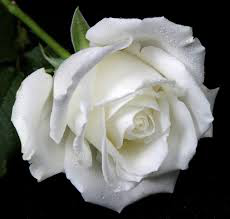

In [82]:
PIL.Image.open(imageList[6])

In [83]:
import cv2
images=[]

for i in range(0,image_count):
        tempPath=imageList[i]
        img=cv2.imread(str(tempPath))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         
        img=cv2.resize(img,(200,200))
        images.append(img)
print(images)

[array([[26, 26, 26, ..., 27, 28, 28],
       [26, 26, 26, ..., 27, 28, 28],
       [26, 26, 26, ..., 26, 27, 27],
       ...,
       [33, 33, 33, ..., 19, 18, 18],
       [33, 33, 33, ..., 18, 18, 18],
       [32, 32, 32, ..., 18, 18, 18]], dtype=uint8), array([[137, 137, 138, ..., 112, 113, 113],
       [137, 138, 138, ..., 113, 114, 114],
       [137, 138, 138, ..., 115, 115, 115],
       ...,
       [ 26,  26,  26, ...,  79,  78,  77],
       [ 26,  26,  26, ...,  70,  70,  74],
       [ 26,  26,  26, ...,  64,  66,  72]], dtype=uint8), array([[139, 141, 144, ..., 183, 181, 178],
       [138, 140, 143, ..., 183, 181, 179],
       [138, 140, 143, ..., 183, 181, 180],
       ...,
       [ 58,  58,  58, ...,  48,  46,  47],
       [ 57,  57,  57, ...,  49,  50,  48],
       [ 57,  57,  57, ...,  52,  51,  48]], dtype=uint8), array([[ 36,  23,  21, ..., 130, 132, 132],
       [ 34,  12,  52, ..., 137, 133, 133],
       [ 14,  32, 104, ..., 136, 134, 134],
       ...,
       [107, 117, 

In [111]:
batch_size = 32
img_height = 180
img_width = 180

In [112]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 5 classes.
Using 24 files for training.


In [113]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 5 classes.
Using 6 files for validation.


In [114]:
class_names = train_ds.class_names
print(class_names)

['Jasmine', 'Lotus', 'Rose', 'Sunflower', 'Sunset']


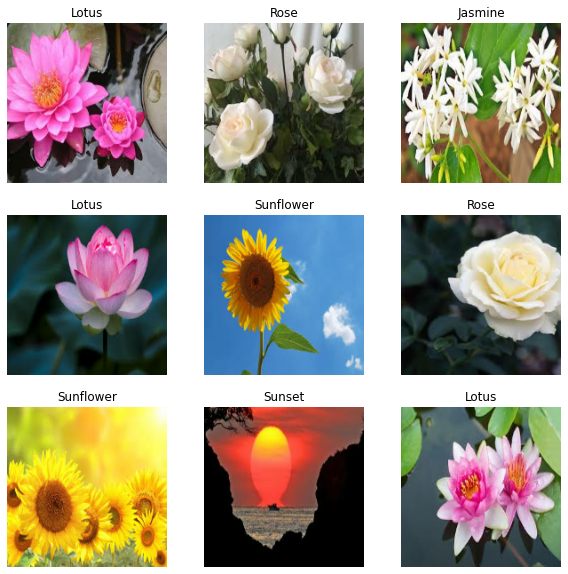

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [116]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(24, 180, 180, 3)
(24,)


In [117]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [118]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [120]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [121]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [122]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [123]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
1/1 [==============================] - 2s 2s/step - loss: 1.6251 - accuracy: 0.1250 - val_loss: 1.7876 - val_accuracy: 0.1667
Epoch 2/3
1/1 [==============================] - 1s 780ms/step - loss: 1.4973 - accuracy: 0.2500 - val_loss: 1.4622 - val_accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 1s 828ms/step - loss: 1.2223 - accuracy: 0.7500 - val_loss: 1.3275 - val_accuracy: 0.6667


In [124]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [125]:
for f in list_ds.take(5):
  print(f.numpy())

b'/content/drive/My Drive/Images/Rose/Rose1.jpeg'
b'/content/drive/My Drive/Images/Jasmine/4.jpeg'
b'/content/drive/My Drive/Images/Sunflower/6.jpeg'
b'/content/drive/My Drive/Images/Sunflower/3.jpeg'
b'/content/drive/My Drive/Images/Rose/Rose3.jpeg'


In [126]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['Jasmine' 'Lotus' 'Rose' 'Sunflower' 'Sunset']


In [127]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [128]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

24
6


In [129]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [130]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [131]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [132]:
img=cv2.imread(str(imageList[0]))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         
img=cv2.resize(img,(200,200))
print(img)

[[26 26 26 ... 27 28 28]
 [26 26 26 ... 27 28 28]
 [26 26 26 ... 26 27 27]
 ...
 [33 33 33 ... 19 18 18]
 [33 33 33 ... 18 18 18]
 [32 32 32 ... 18 18 18]]


In [135]:
import os
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [136]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  3


In [137]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

Y_Predicted:


['Lotus', 'Rose', 'Sunflower', 'Lotus', 'Sunflower', 'Jasmine']

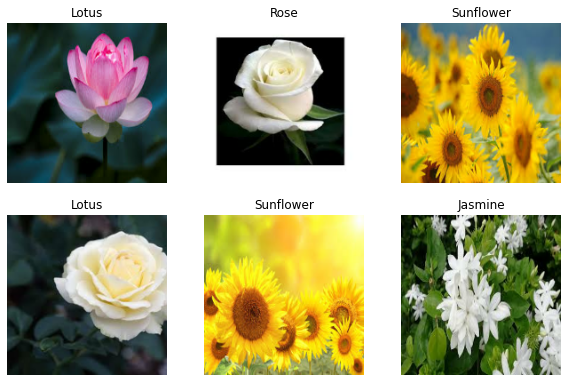

In [138]:
image_batch, label_batch = next(iter(val_ds))

plt.figure(figsize=(10, 10))
y_predicted=[]
y_actual=[]
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  #plt.title(class_names[labels[i]])
  y_actual.append(class_names[label_batch[i]])
  img_array = tf.keras.preprocessing.image.img_to_array(image_batch[i])
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis

  predictions = model.predict(img_array)
  score = predictions[0]
  #print(max(score))
  index_min = np.argmax(score)
  #print(index_min)
 
  label_p = index_min
  y_predicted.append(class_names[label_p])
  plt.title(class_names[label_p])
  #plt.title(class_names[label])
  plt.axis("off")
print("Y_Predicted:")
y_predicted

In [139]:
print("y_actual:")
y_actual

y_actual:


['Lotus', 'Rose', 'Sunflower', 'Rose', 'Sunflower', 'Jasmine']

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted, labels=np.unique(y_predicted)))

              precision    recall  f1-score   support

     Jasmine       1.00      1.00      1.00         1
       Lotus       0.50      1.00      0.67         1
        Rose       1.00      0.50      0.67         2
   Sunflower       1.00      1.00      1.00         2

    accuracy                           0.83         6
   macro avg       0.88      0.88      0.83         6
weighted avg       0.92      0.83      0.83         6

